In [40]:
import numpy as np
import matplotlib.pyplot as plt

# THE VARIATIONAL THEOREM:

The equation in the continuos domain:

$$ E_{min} \le \frac{ \langle \psi | \widehat{H} | \psi \rangle }{\langle \psi | \psi \rangle } $$

$$ \langle \psi | \widehat{H} | \psi \rangle = \int_{-\infty}^{\infty} \psi(x)^{*}\widehat{H}\psi(x) $$

For this case the $\psi(x)$ funtion is the trial function that has a parameter and can be whatever.  

For out case (the most symple) the trial function for the harmonic ascillator hamiltonian:   
We will use atomic numbers.

$$ \psi(x) = e^{-\alpha x^{2}} $$

$$ \widehat{H} = -\frac{1}{2}\frac{\delta^2}{\delta x^2} + \frac{x^2}{2} $$

The idea algorithm is to has a function and make the hamiltonian and optimize with respect to the alpha value.



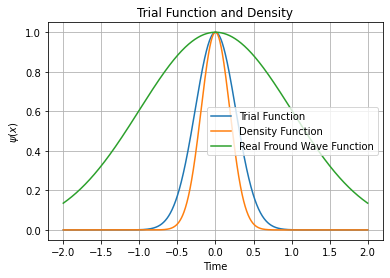

In [41]:
# Define the limits a and b:

a = -2
b = 2
alpha = 7

x = np.linspace(a,b,1000)
Trial = np.exp(-alpha*x**2)
DensityTrial = Trial*Trial

plt.plot(x,Trial, label="Trial Function")
plt.plot(x,DensityTrial, label ="Density Function")
plt.plot(x,np.exp(-0.5*x**2),label = "Real Fround Wave Function")
plt.ylabel("$\psi(x)$")
plt.xlabel("Time")
plt.title("Trial Function and Density")
plt.grid()
plt.legend()
plt.show()

In [42]:
# Define the discrete integral and derivate for the function.

def Integral(x,function):
    dx = np.abs(x[1]-x[0])
    sum = 0
    for i in range(len(x)-1):
        sum = sum+(function[i]+function[i+1])*dx
    sum = sum/2 ## Not sure about this
    return sum

def Derivate(x,function):
    dx = np.abs(x[1]-x[0])
    der = []
    for i in range(len(x)):
        if i==len(x)-1:
            der.append((function[i]-function[i-1])/dx)
        else:
            der.append((function[i+1]-function[i])/dx)
    return der

In [43]:
#Divede the function in terms of Potential and Kinetic energy:

# Potential energy
Potential = 0.5*x*x
PotentialFunc = Trial*Potential*Trial
P = Integral(x,PotentialFunc)

# Kinetic Energy
FD = Derivate(x,Trial)
SD = Derivate(x,FD)
Kinetic = -0.5*Trial*SD
K = Integral(x,Kinetic)

# Normalization condition
Norm = Integral(x,DensityTrial)

In [44]:
# Test the total energy.

Es = (P+K)/Norm
Es

3.5171698257300226

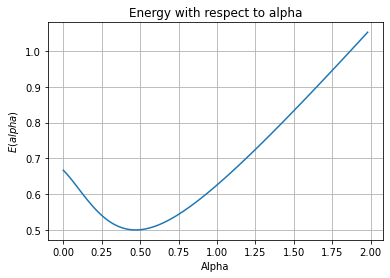

In [45]:
# Design the algorithm to see all the values of alpha.as_integer_ratio

Res = []
alphaval = []
lenf = 100

for k in range(lenf):

    # We only takes positive values. Due if we have negative value the trial function diverge.
    ls = 0
    rs = 2

    alpha = ls +(rs/lenf)*k
    x = np.linspace(a,b,1000)
    Trial = np.exp(-alpha*x*x)
    DensityTrial = Trial*Trial
    Norm = Integral(x,DensityTrial)
    Potential = 0.5*x*x
    PotentialFunc = Trial*Potential*Trial
    P = Integral(x,PotentialFunc)
    FD = Derivate(x,Trial)
    SD = Derivate(x,FD)
    Kinetic = -0.5*Trial*SD
    K = Integral(x,Kinetic)
    Es = (P+K)/Norm
    Res.append(Es)
    alphaval.append(alpha)

plt.plot(alphaval,Res)
plt.ylabel("$E(alpha)$")
plt.xlabel("Alpha")
plt.title("Energy with respect to alpha")
plt.grid()
plt.show()

In [46]:
# Here we can see that the optime value is near to the alpha value = 0.5. That correspond to the groud state.

Here we can see that the optime value is near to the alpha value = 0.5. That correspond to the groud state.

$$ \psi(x) = e^{-\frac{x^{2}}{2}}$$

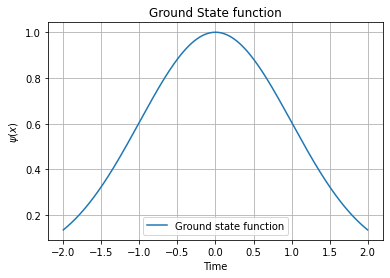

In [47]:
x = np.linspace(a,b,1000)
Trial = np.exp(-0.5*x**2)
DensityTrial = Trial*Trial

plt.plot(x,Trial, label="Ground state function")
plt.ylabel("$\psi(x)$")
plt.xlabel("Time")
plt.title("Ground State function")
plt.grid()
plt.legend()
plt.show()